# Data Acquisition

In [2]:
import json
import numpy as np
import pandas as pd

f = open('floopData02-16-2022-21-06-37.json')
data = json.load(f)
a = np.array(data,dtype=object)
alist = []

num = 0

for i in a:
    length = len(a[num])
    alist.append(length)
    num += 1

b = np.array(alist)


In [3]:
import nltk
nltk.download('nps_chat')
nltk.download('punkt')
from nltk.corpus import nps_chat

Question_Words = [ 'where','how','why','did','do','does',"isn't",'has','am i', 'are','can','could','is','may',"can't", 
"didn't",'will','when',"doesn't","haven't",'have','what',"aren't",'would',"couldn't","wouldn't","won't","shouldn't",'should']

questionList = []

posts = nltk.corpus.nps_chat.xml_posts()[:10000]
    #input chat posts
    # 2. Tokenize sentences using NLTK's word_tokenize
    # return dict of tokenized words

def post_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains({})'.format(word.lower())] = True

    return features

#feature=dialogue_act_features(posts)

    #Input: none
    #  1. Divide data into 80% training and 10% testing sets
    # 2. Use NLTK's Multinomial Naive Bayes to perform classifcation    
    # Return: Classifier object

def __perform_classification():
        featuresets = [(post_features(post.text), post.get('class')) for post in posts]

        #print(f)
        training_size = int(len(featuresets) * 0.1)
        train_set, test_set = featuresets[training_size:], featuresets[:training_size]

        classifier = nltk.NaiveBayesClassifier.train(train_set)

        #$print(classifier)
        return classifier



cl= __perform_classification()


types = ["whQuestion","ynQuestion","Statement"]
# Input a sentence
# returns the type sentence
def is_ques(ques):
    question_type = cl.classify(post_features(ques)) 

    return  question_type



    # Method : IsQuestion
    # Input: Sentence to be predicted
    # Return: type of sentence it is using nltk  
def IsQuestion(sentence):
    type=is_ques(sentence)
    #print("type is"+type) 
    first_word = sentence.split()[0].lower()  


    if  ((type=="whQuestion" or type== "ynQuestion") or (first_word in Question_Words ))  :

        return 1

    elif type=="Other" or type== "Reject":
        return 2  

    else:        
        return 0

for j in a:
    changeStr = ' '.join([str(elem) for elem in j])
    check = IsQuestion(changeStr)
    #if check == "NaN":
        #print(changeStr)
    questionList.append(check)

# print(questionList)

[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\jiajh\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiajh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
import string
from collections import Counter
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

sentimentList = []
keywordList = []

key_words = ["noticed", "like", "feel", "realize", "want", "success", "change", "transform", "convert", "evaluate", 
"estimate", "measure", "compartmentalize", "create", "cause", "effect", "achieve", "accomplish", "important", "significant",
"consider", "believe", "think", "recall", "remind", "attention", "regard", "interest", "lirst", "last",
"explain", "decide", "determine", "identify", "influence", "affect", "put"]

def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        return 0
    elif score['neg'] < score['pos']:
        return 1
    else:
        return 2
        
def clean_sentence(feedback):
    lower_case = feedback.lower()
    cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
    
    return cleaned_text

def key_words_search(feedback):
    tokenized_words = feedback.split()
    lemma_words = []
    count_key = 0
    
    for word in tokenized_words:
        word = WordNetLemmatizer().lemmatize(word)
        lemma_words.append(word)
        
    for word in lemma_words:
        if word in key_words:
            count_key = count_key + 1
    
    return count_key
    
for h in a:
    changeStr = ' '.join([str(elem) for elem in h])
    cleaned_text = clean_sentence(changeStr)
    keyword = key_words_search(cleaned_text)
    result = sentiment_analyse(cleaned_text)
    sentimentList.append(result)
    keywordList.append(keyword)

#print(keywordList)
#print(sentimentList)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jiajh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiajh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiajh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df = pd.DataFrame({"cover_length": b, "question":questionList, "keywords": keywordList, "sentiment":sentimentList})
print("question True:1 False:0 another:2, keywords: frequency, sentiment: Positive:1 Negative:0 Neutral:2")
df.head()

question True:1 False:0 another:2, keywords: frequency, sentiment: Positive:1 Negative:0 Neutral:2


,cover_length,question,keywords,sentiment
0,1,0,0,2
1,1,0,0,1
2,2,0,1,1
3,5,0,0,1
4,1,0,0,2


## Assumptions:  feedback got more replies than the average it is good

In [7]:
df["good_feedback"] = df["cover_length"] > df["cover_length"].mean()
df.head()


,cover_length,question,keywords,sentiment,good_feedback
0,1,0,0,2,False
1,1,0,0,1,False
2,2,0,1,1,True
3,5,0,0,1,True
4,1,0,0,2,False


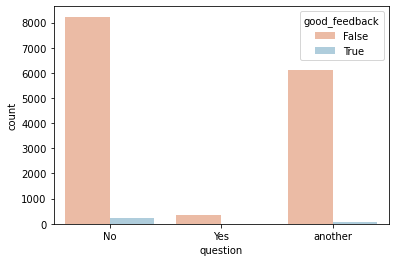

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(x='question', hue='good_feedback', data=df, palette='RdBu')
plt.xticks([0,1,2], ['No', 'Yes', 'another'])
plt.show()

# check the correlation coefficient

In [9]:
columns = ['cover_length', 'question', 'keywords', 'sentiment', 'good_feedback']
subset = df[columns]
subset.corr()

,cover_length,question,keywords,sentiment,good_feedback
cover_length,1.000000,-0.041907,0.199970,-0.088903,0.824634
question,-0.041907,1.000000,-0.103646,0.141254,-0.046258
keywords,0.199970,-0.103646,1.000000,-0.148551,0.129271
sentiment,-0.088903,0.141254,-0.148551,1.000000,-0.097538
good_feedback,0.824634,-0.046258,0.129271,-0.097538,1.000000


The result is a "corelation matrix". 
Looks like the good_feedback has more corrlation with keywords because its positive.

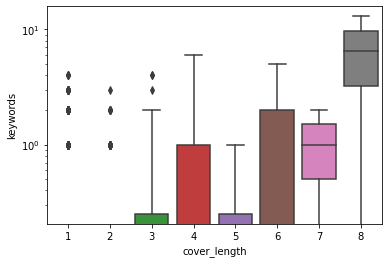

In [10]:
sns.boxplot(x='cover_length', y = 'keywords', data=df, whis=10)
plt.yscale('log')
plt.show()

# Visualizing and Numerical EDA for the good feedback

In [20]:
good_feedback = df[df["good_feedback"] == True]
print(good_feedback.describe())

       cover_length    question    keywords   sentiment
count    306.000000  306.000000  306.000000  306.000000
mean       2.604575    0.535948    0.362745    1.153595
std        1.091177    0.868586    1.063146    0.686595
min        2.000000    0.000000    0.000000    0.000000
25%        2.000000    0.000000    0.000000    1.000000
50%        2.000000    0.000000    0.000000    1.000000
75%        3.000000    1.750000    0.000000    2.000000
max        8.000000    2.000000   13.000000    2.000000


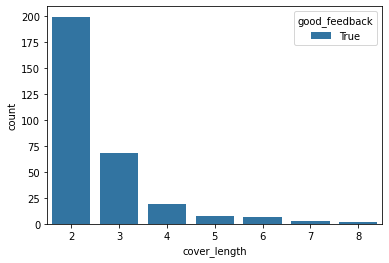

In [12]:
plt.figure()
sns.countplot(x='cover_length', hue='good_feedback', data=good_feedback)
plt.show()

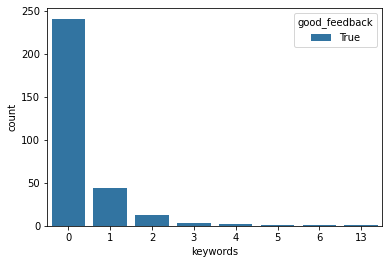

In [13]:
plt.figure()
sns.countplot(x='keywords', hue='good_feedback', data=good_feedback)
plt.show()

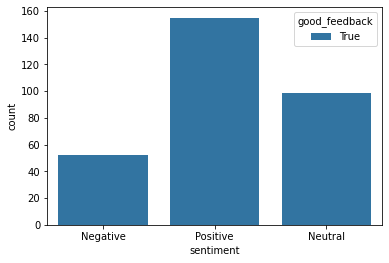

In [14]:
plt.figure()
sns.countplot(x='sentiment', hue='good_feedback', data=good_feedback)
plt.xticks([0,1,2], ['Negative', 'Positive', 'Neutral'])
plt.show()

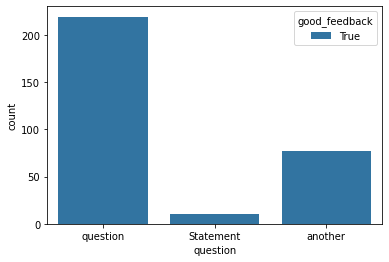

In [15]:
plt.figure()
sns.countplot(x='question', hue='good_feedback', data=good_feedback)
plt.xticks([0,1,2], ['question', 'Statement', 'another'])
plt.show()

# Tag the dataset with "good" and "bad" and store in temporary list

In [18]:
temp_List = a 
num = 0
avg_length = df["cover_length"].mean()
for i in a:
    length = len(a[num])
    if length >= avg_length:
        temp_List[num].append({'quality_feedback':True})
    else:
        temp_List[num].append({'quality_feedback':False})
    
    num += 1

# Split the data 70/30 randomly

In [60]:
import random

X_test = []
X_train = []
y_test = []
y_train = []
count_good = 0
count_bad = 0

# shuffle the data randomly
teamp_list = df.values.tolist()
random.shuffle(teamp_list)

# get the 30% of good feedback and bad feedback
good_feedback = df[df["good_feedback"] == True]
bad_feedback = df[df["good_feedback"] == False]
good_30 = int(len(good_feedback) * 0.3)
bad_30 = int(len(bad_feedback) * 0.3)

# put data into 30% test 70% train 
for i in range(len(teamp_list)):
    if teamp_list[i][4]== False:
        if count_bad <= bad_30:
            X_test.append(teamp_list[i][0:4])
            y_test.append(teamp_list[i][4])
            count_bad = count_bad + 1
        else:
            X_train.append(teamp_list[i][0:4])
            y_train.append(teamp_list[i][4])
    else:
        if count_good <= good_30:
            X_test.append(teamp_list[i][0:4])
            y_test.append(teamp_list[i][4])
            count_good = count_good + 1
        else:
            X_train.append(teamp_list[i][0:4])
            y_train.append(teamp_list[i][4])

#print(len(X_test))
#print(len(X_train))
#print('--------------------------------------------------------------------')
#print(len(y_test))
#print(len(y_train))

4501
10499
--------------------------------------------------------------------
4501
10499


# Create linear regression classifier and check the accuracy of the model

In [61]:
from sklearn.linear_model import LinearRegression

# create Linear Regression classifier
reg = LinearRegression()

# fit the data in it
reg.fit(X_train, y_train)

# print the accuracy of the model
# expected that will be low
print(reg.score(X_test, y_test))

0.6004170908322115
